#ADHERANCE = no more than 1 min early, or 6 mins late

**Dataset Columns:**  
CALENDAR_ID: Identifier for the date  
SERVICE_ABBR: Service Type. indicates the schedule type operating that day. 1 = Weekday, 2 = Saturday, 3 = Sunday. Normally this corresponds to the day of the week, but sometimes Saturday or Sunday service will run on a weekday (i.e. during a holiday).  
ADHERENCE_ID: Unique identifier for each record  
DATE: Trip date  
ROUTE_ABBR: Route identifier. Routes can be found here https://www.wegotransit.com/ride/maps-schedules/bus/. For example, Route 55 is Murfreesboro Pike  
BLOCK_ABBR: Indicates the section (block) of the route that the given stop is on  
OPERATOR: Indicates the operator (driver)  
TRIP_ID: Identifies the trip; Note that a TRIP_ID is reused for the a given route and scheduled time, so it does not uniquely identify a trip, but can be used in combination with the CALENDAR_ID.  
OVERLOAD_ID: signifies that the record is from a trip that was added by the dispatcher and was not part of the original schedule for the day. Usually, these are created when one vehicle breaks down and another is covering the same service. As far as the actual value, 0 means that this record was part of the original schedule, and anything other than 0 means it was added.  
ROUTE_DIRECTION_NAME: Which direction the trip is going; Either to downtown or from downtown  
TIME_POINT_ABBR: Identifies the time point of the record.  
ROUTE_STOP_SEQUENCE: Identifies the stop point.  
TRIP_EDGE: defines whether the stop is the first one on the trip (1), an intermediate stop (0), or the last one on a trip (2)  
LATITUDE/LONGITUDE: Location in lat/long  
SCHEDULED_TIME: Scheduled stop time  
ACTUAL_ARRIVAL_TIME: actual arrival time  
ACTUAL_DEPARTURE_TIME: actual departure time  
ADHERENCE: Difference between actual departure time and scheduled time; negative indicates departure time after scheduled time and positive indicates departure time before scheduled time. Generally, on-time is considered to be no more than 6 minutes lates and no more than one minute early, but there are some exceptions to these cutoffs. Whether or not a bus is on-time can be determined by looking at the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.  
SCHEDULED_HDWY: Scheduled headway in minutes for the given timepoint crossing record; headway is the difference between the scheduled_time and the previous scheduled time for that stop  
ACTUAL_HDWY: Actual headway  
HDWY_DEV: calculates headway deviation in minutes as the difference between actual and scheduled headway. Negative values indicate a shorter headway than scheduled (i.e. bunching) and positive values indicate a longer headway than scheduled (i.e. gapping)  
ADJUSTED_EARLY_COUNT: An indicator for if the bus is considered to be early  
ADJUSTED_LATE_COUNT: An indicator for if the bus is considered to be late  
ADJUSTED_ONTIME_COUNT: An indicator for if the bus is considered to be on time  
STOP_CANCELLED:	flags whether a crossing was canceled or waived  
PREV_SCHED_STOP_CANCELLED: flags whether the previous timepoint crossing was cancelled or waived. Useful for excluding records where the headway values are extremely high because the bus is just coming off a detour  
IS_RELIEF: flags whether a particular crossing is a relief - i.e. the first timepoint crossing of a new driver on the bus/block  
DWELL_IN_MINS: Actual Departure Time - Actual Arrival Time (in minutes)  
SCHEDULED_LAYOVER_MINUTES: Applies only for TRIP_EDGE 1 (the beginning of a trip). Tells how much time between the scheduled time at the end of the previous trip and the current trip. 

3: West End
7: Hillsboro
22: Bordeaux
23: Dickerson Pike
50: Charlotte Pike
52: Nolensville Pike
55: Murfreesboro Pike
56: Gallatin Pike

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [5]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [6]:
wego['OPERATOR'].nunique()

341

In [7]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

In [9]:
wego.groupby('ROUTE_ABBR')['ADHERENCE'].describe().reset_index()

,ROUTE_ABBR,count,mean,std,min,25%,50%,75%,max
0,3,45488.0,-3.761491,5.415910,-133.250000,-5.350000,-2.566666,-0.766666,33.750000
1,7,17267.0,-3.346555,6.669753,-87.716666,-4.916666,-2.116666,-0.616666,88.383333
2,22,25188.0,-1.138107,6.391798,-675.000000,-2.950000,-0.933333,0.816666,24.733333
3,23,39653.0,-1.760110,7.680491,-618.166666,-3.116666,-1.316666,0.033333,33.633333
4,50,42629.0,-2.505022,6.159666,-489.316666,-3.883333,-1.800000,-0.300000,22.350000
5,52,49327.0,-3.971342,8.721732,-948.533333,-5.016666,-2.066666,-0.400000,30.200000
6,55,60359.0,-4.823302,7.535092,-375.233333,-6.583333,-2.883333,-0.850000,40.250000
7,56,58950.0,-2.703988,4.931009,-322.783333,-4.300000,-1.900000,-0.283333,39.916666


In [10]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

In [11]:
df1 = wego[wego['TRIP_EDGE'] == 0]  

<Axes: xlabel='ROUTE_ABBR', ylabel='ADHERENCE'>

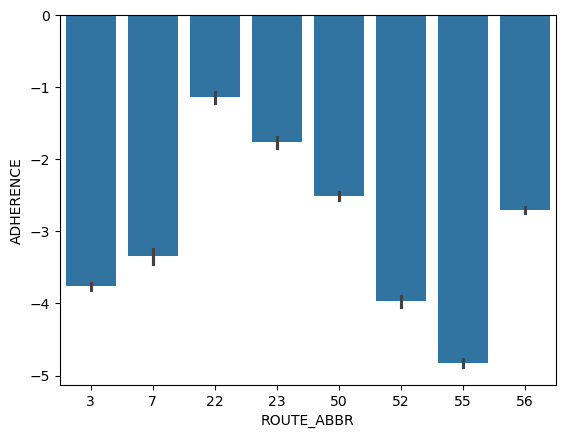

In [12]:
sns.barplot(x=wego['ROUTE_ABBR'], y=wego['ADHERENCE']) 

<Axes: xlabel='ROUTE_ABBR', ylabel='ADHERENCE'>

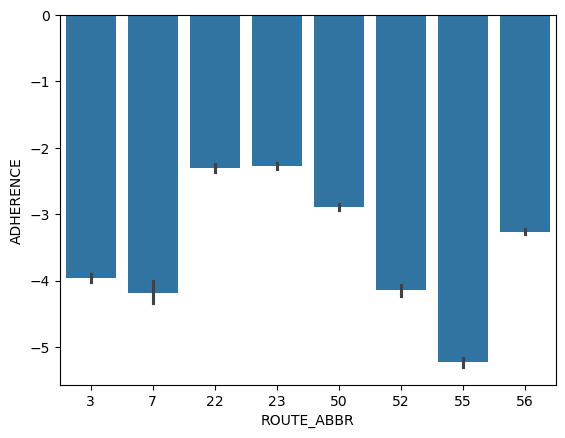

In [13]:
sns.barplot(x=df1['ROUTE_ABBR'], y=df1['ADHERENCE'])

<Axes: xlabel='ROUTE_ABBR', ylabel='ADJUSTED_ONTIME_COUNT'>

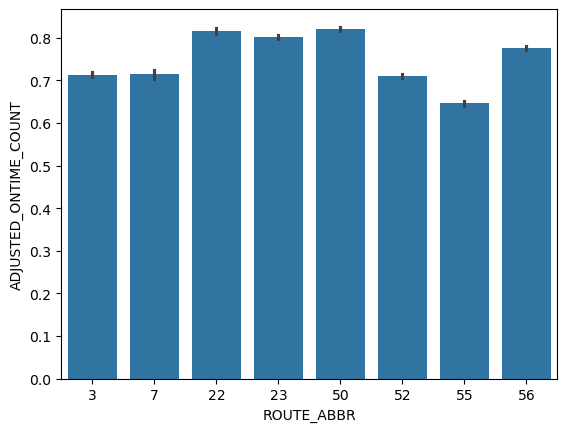

In [14]:
sns.barplot(x=df1['ROUTE_ABBR'], y=df1['ADJUSTED_ONTIME_COUNT'])

ax = sns.scatterplot(data=df1,
                     x='ROUTE_ABBR',
                     y='ADHERENCE',
                     hue='ADJUSTED_ONTIME_COUNT',
                     palette='husl')
# Adding text annotations
for i in range(df1.shape[0]):
    plt.text(x=df1['ROUTE_ABBR'][i] + 1,
             y=df1['ADHERENCE'][i],
             s=df1['ADJUSTED_ONTIME_COUNT'][i],
             fontsize=7,
             ha='center',
             va='bottom')
# Setting the minimum value for the y-axis
ax.set_ylim(bottom=wdf1['ADHERENCE'].min())
plt.legend(bbox_to_anchor=(1.01, .95), loc='upper left', borderaxespad=0.)
plt.title('')
plt.xlabel('Sum of opioids')
plt.ylabel('Overdose Deaths')
# plt.savefig(r'C:\Users\johnc\Desktop\DA12\Python\opioids_deaths11.png', bbox_inches='tight')
plt.show()

In [16]:
hdwydf = (
    wego
    #.loc[wego['ROUTE_ABBR'] == 22]
    #.loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    #.loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['ROUTE_ABBR', 'OPERATOR', 'DATE', 'TRIP_ID','LATITUDE', 'LONGITUDE', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'ADHERENCE','SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .dropna()
)
hdwydf.head(3)

,ROUTE_ABBR,OPERATOR,DATE,TRIP_ID,LATITUDE,LONGITUDE,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
879,23,409,2023-08-01,345573,36.244060,-86.757403,DWMRT,FROM DOWNTOWN,1,2023-08-01 04:45:00,-0.283333,25.0,2023-08-01 04:45:17,24.566666,-0.433334
3973,55,3124,2023-08-01,347538,36.052637,-86.654878,HHWM,TO DOWNTOWN,1,2023-08-01 04:46:00,-0.983333,23.0,2023-08-01 04:46:59,23.083333,0.083333
3974,55,3124,2023-08-01,347538,36.072852,-86.636862,MXBELL,TO DOWNTOWN,0,2023-08-01 04:53:00,-1.450000,23.0,2023-08-01 04:54:27,23.833333,0.833333


In [17]:
hdwy22 = (
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    #.loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    #.loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['ROUTE_ABBR', 'OPERATOR', 'DATE', 'TRIP_ID','LATITUDE', 'LONGITUDE', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'ADHERENCE', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .dropna()
)
hdwy22.head(3)

,ROUTE_ABBR,OPERATOR,DATE,TRIP_ID,LATITUDE,LONGITUDE,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
124,22,1617,2023-08-01,345213,36.181248,-86.847705,MHSP,TO DOWNTOWN,1,2023-08-01 05:07:00,0.950000,25.0,2023-08-01 05:06:03,21.916666,-3.083334
125,22,1617,2023-08-01,345213,36.193454,-86.839981,ELIZ,TO DOWNTOWN,0,2023-08-01 05:11:00,0.050000,25.0,2023-08-01 05:10:57,22.500000,-2.500000
126,22,1617,2023-08-01,345213,36.182177,-86.814445,CV23,TO DOWNTOWN,0,2023-08-01 05:19:00,0.016666,25.0,2023-08-01 05:18:59,24.050000,-0.950000


In [18]:
hdwy23 = (
    wego
    .loc[wego['ROUTE_ABBR'] == 23]
    #.loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    #.loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['ROUTE_ABBR', 'OPERATOR', 'DATE', 'TRIP_ID','LATITUDE', 'LONGITUDE', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'ADHERENCE', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .dropna()
)
hdwy23.head(3)

,ROUTE_ABBR,OPERATOR,DATE,TRIP_ID,LATITUDE,LONGITUDE,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
879,23,409,2023-08-01,345573,36.244060,-86.757403,DWMRT,FROM DOWNTOWN,1,2023-08-01 04:45:00,-0.283333,25.0,2023-08-01 04:45:17,24.566666,-0.433334
880,23,409,2023-08-01,345573,36.231512,-86.780490,EDBC,FROM DOWNTOWN,0,2023-08-01 04:54:00,-1.550000,25.0,2023-08-01 04:55:33,27.150000,2.150000
491,23,1893,2023-08-01,345435,36.244060,-86.757403,DWMRT,FROM DOWNTOWN,1,2023-08-01 05:00:00,-3.233333,15.0,2023-08-01 05:03:14,17.950000,2.950000


In [19]:
hdwy52 = (
    wego
    .loc[wego['ROUTE_ABBR'] == 52]
    #.loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    #.loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['ROUTE_ABBR', 'OPERATOR', 'DATE', 'TRIP_ID','LATITUDE', 'LONGITUDE', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'ADHERENCE', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .dropna()
)
hdwy52.head(3)

,ROUTE_ABBR,OPERATOR,DATE,TRIP_ID,LATITUDE,LONGITUDE,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
2980,52,522,2023-08-01,347164,36.048934,-86.713854,HCKP,TO DOWNTOWN,1,2023-08-01 04:55:00,-0.316666,22.0,2023-08-01 04:55:19,20.550000,-1.450000
2981,52,522,2023-08-01,347164,36.082032,-86.726914,WMRT,TO DOWNTOWN,0,2023-08-01 05:07:00,0.216666,22.0,2023-08-01 05:06:47,19.250000,-2.750000
2982,52,522,2023-08-01,347164,36.112037,-86.745666,THNV,TO DOWNTOWN,0,2023-08-01 05:14:00,-0.933333,22.0,2023-08-01 05:14:56,22.033333,0.033333


<Axes: xlabel='ROUTE_ABBR', ylabel='HDWY_DEV'>

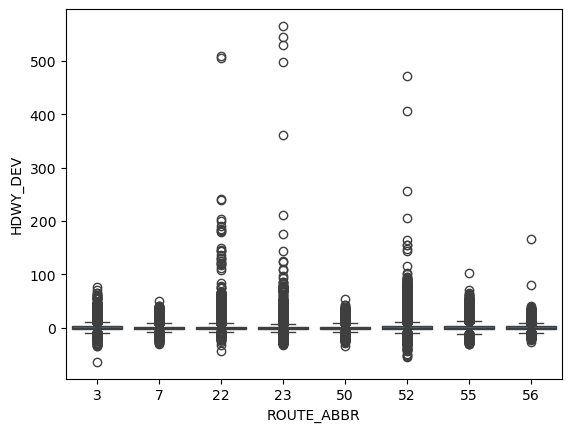

In [20]:
sns.boxplot(x=hdwydf['ROUTE_ABBR'], y=hdwydf['HDWY_DEV'])

C:\Users\shane\AppData\Local\Temp\ipykernel_25936\2427058859.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ROUTE_ABBR', y='HDWY_DEV',
C:\Users\shane\AppData\Local\Temp\ipykernel_25936\2427058859.py:1: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='ROUTE_ABBR', y='HDWY_DEV',


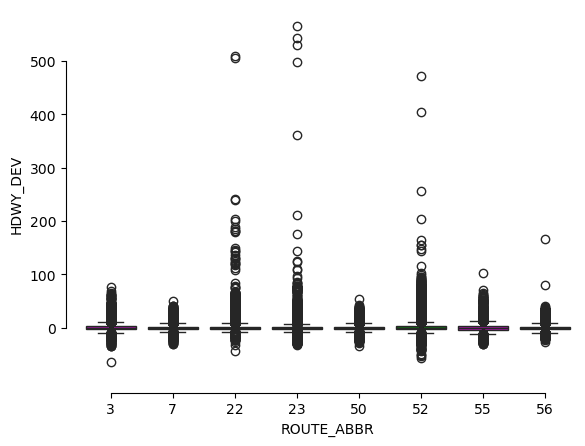

In [40]:
sns.boxplot(x='ROUTE_ABBR', y='HDWY_DEV',
            palette=["m", "g"],
            data=hdwydf)
sns.despine(offset=10, trim=True)

In [44]:
hdwy22.sort_values(by = 'ADHERENCE', ascending = False).head(20)

,ROUTE_ABBR,OPERATOR,DATE,TRIP_ID,LATITUDE,LONGITUDE,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
19624,22,1190,2023-08-04,350135,36.181248,-86.847705,MHSP,TO DOWNTOWN,1,2023-08-04 13:45:00,20.333333,50.0,2023-08-04 13:24:40,80.616666,30.616666
280185,22,2646,2023-09-19,350242,36.186350,-86.816998,25ACLARK,TO DOWNTOWN,1,2023-09-19 08:36:00,19.816666,30.0,2023-09-19 08:16:11,9.483333,-20.516667
280179,22,2646,2023-09-19,350240,36.186350,-86.816998,25ACLARK,TO DOWNTOWN,1,2023-09-19 07:36:00,19.750000,30.0,2023-09-19 07:16:15,8.566666,-21.433334
280191,22,2646,2023-09-19,350244,36.186350,-86.816998,25ACLARK,TO DOWNTOWN,1,2023-09-19 09:34:00,17.400000,28.0,2023-09-19 09:16:36,10.250000,-17.750000
121326,22,1762,2023-08-22,350235,36.167091,-86.781923,MCC5_10,FROM DOWNTOWN,1,2023-08-22 17:53:00,15.966666,13.0,2023-08-22 17:37:02,10.000000,-3.000000
121320,22,1762,2023-08-22,350233,36.167091,-86.781923,MCC5_10,FROM DOWNTOWN,1,2023-08-22 17:03:00,15.933333,13.0,2023-08-22 16:47:04,8.950000,-4.050000
121296,22,1762,2023-08-22,350225,36.167091,-86.781923,MCC5_10,FROM DOWNTOWN,1,2023-08-22 13:43:00,15.733333,13.0,2023-08-22 13:27:16,10.216666,-2.783334
154902,22,1603,2023-08-28,349950,36.181248,-86.847705,MHSP,TO DOWNTOWN,1,2023-08-28 12:05:00,15.416666,50.0,2023-08-28 11:49:35,32.150000,-17.850000
121284,22,1762,2023-08-22,350221,36.167091,-86.781923,MCC5_10,FROM DOWNTOWN,1,2023-08-22 12:03:00,15.316666,13.0,2023-08-22 11:47:41,10.433333,-2.566667
154931,22,2689,2023-08-28,349958,36.181248,-86.847705,MHSP,TO DOWNTOWN,1,2023-08-28 17:05:00,14.733333,50.0,2023-08-28 16:50:16,32.200000,-17.800000


In [50]:
hdwy22['ADHERENCE'].mean()

-2.095469332216146